<a href="https://colab.research.google.com/github/LuanK63/6351071043_LAB3/blob/main/6351071043_LAB3_Bai3(Trang7).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3. (Lập	trình)	Sử	dụng Neural	Network	để	xây	dựng	mô	hình	phân	lớp	trên
bộ	dữ	liệu	MNIST	từ	thư	viện	Keras (k-fold	cross	validation)

a) Đọc	bộ	dữ	liệu	train,	test	của	MNIST	từ	Keras

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


b) In	ra	kích	thước	của	tập	train,	test:

In [4]:

print(f"Kích thước tập Train: {train_images.shape}")
print(f"Kích thước tập Test: {test_images.shape}")

Kích thước tập Train: (60000, 28, 28)
Kích thước tập Test: (10000, 28, 28)


c) Chuẩn	hóa	các	giá	trị pixel	của	ảnh	về	đoạn	[0,1]

In [5]:

train_images = train_images.astype('float32') / 255.0
test_images = test_images.astype('float32') / 255.0

X = train_images
y = train_labels

print("Đã chuẩn hóa dữ liệu xong.")

Đã chuẩn hóa dữ liệu xong.


d) Định	nghĩa	hàm	create_model,	bao	gồm:
- Model	là	Neural Network	tương	tự	như	câu	2
- Biên	 dịch	 mô	 hình	 sử	 dụng	 optimizer:	 adam;	 loss:
sparse_categorical_crossentropy;	metric:	accuracy

In [6]:

def create_model():
    model = Sequential()
    model.add(Flatten(input_shape=(28, 28)))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


e) Huấn	luyện	mô	hình bằng	k-fold	cross	validation	(với	k=10).
Trong	quá	trình	huấn	luyện	lưu	và	in	ra	kết	quả	loss	và	accuracy	của	từng	fold,
lưu	lại	mô	hình	sau	mỗi	fold.

Hướng	dẫn:
- Sử	dụng	KFold	trong	sklearn	để	định	nghĩa	kfold	với	n_spilts	=	10,	shutfle	=	True,
random_state=42
- Với	mỗi	fold:	train_index,	val_index	in	kfold.split(train_images)
  - Gán	model	là	kết	quả	của	hàm	create_model()
  - Gán	X_train_fold,	X_val_fold,	y_train_fold,	y_val_fold
  - Huấn	luyện	mô	hình	dựa	trên	tập	train (X_train_fold,	y_train_fold), đánh
giá	với	tập	validation (X_val_fold,		y_val_fold);	epoch:	5;	batch_size:	32.
  - Lưu	model	huấn	luyện	được	vào	mảng	models
  - Tính	và in	accuracy	và	loss	của	fold.	Lưu	vào	mảng	accuracy_per_fold[]	và
loss_per_fold[].

In [8]:

num_folds = 10
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)

acc_per_fold = []
loss_per_fold = []
models = []

fold_no = 1
for train_index, val_index in kfold.split(X):
    print(f'Training for fold {fold_no} ...')

    X_train_fold, X_val_fold = X[train_index], X[val_index]
    y_train_fold, y_val_fold = y[train_index], y[val_index]

    model = create_model()

    history = model.fit(X_train_fold, y_train_fold,
                        epochs=5,
                        batch_size=32,
                        validation_data=(X_val_fold, y_val_fold),
                        verbose=0)

    scores = model.evaluate(X_val_fold, y_val_fold, verbose=0)

    print(f'Score for fold {fold_no}: Loss of {scores[0]:.4f}; Accuracy of {scores[1]*100:.2f}%')

    acc_per_fold.append(scores[1])
    loss_per_fold.append(scores[0])
    models.append(model)

    fold_no += 1

print("\nHoàn thành quá trình huấn luyện K-Fold.")

Training for fold 1 ...
Score for fold 1: Loss of 0.0739; Accuracy of 97.78%
Training for fold 2 ...
Score for fold 2: Loss of 0.0814; Accuracy of 97.57%
Training for fold 3 ...
Score for fold 3: Loss of 0.0869; Accuracy of 97.53%
Training for fold 4 ...
Score for fold 4: Loss of 0.0755; Accuracy of 97.90%
Training for fold 5 ...
Score for fold 5: Loss of 0.0936; Accuracy of 97.25%
Training for fold 6 ...
Score for fold 6: Loss of 0.0814; Accuracy of 97.60%
Training for fold 7 ...
Score for fold 7: Loss of 0.0912; Accuracy of 97.45%
Training for fold 8 ...
Score for fold 8: Loss of 0.0829; Accuracy of 97.57%
Training for fold 9 ...
Score for fold 9: Loss of 0.0898; Accuracy of 97.23%
Training for fold 10 ...
Score for fold 10: Loss of 0.0778; Accuracy of 97.52%

Hoàn thành quá trình huấn luyện K-Fold.


f) Tính	và	in	ra	Mean	Accuracy,	Standard	deviation	accuracy (độ	lệch	chuẩn
của	Accuracy),	Mean	Loss,	Standard	deviation loss	của	mô	hình	trong	quá
trình	huấn	luyện

Hướng	dẫn:	Sử	dụng	mean,	std trong	numpy

In [9]:
print("\nNguyễn Thành Luân - 6351071043")
print('--- KẾT QUẢ TỔNG HỢP ---')
print(f'Mean Accuracy: {np.mean(acc_per_fold)*100:.2f}% (+- {np.std(acc_per_fold)*100:.2f}%)')
print(f'Mean Loss: {np.mean(loss_per_fold):.4f} (+- {np.std(loss_per_fold):.4f})')


Nguyễn Thành Luân - 6351071043
--- KẾT QUẢ TỔNG HỢP ---
Mean Accuracy: 97.54% (+- 0.20%)
Mean Loss: 0.0834 (+- 0.0064)


g) Vẽ	biểu	đồ	thể	hiện	accuracy,	loss	sau	mỗi	fold.

Hướng	dẫn:	Sử	dụng	plot	trong	matplotlib


Nguyễn Thành Luân - 6351071043


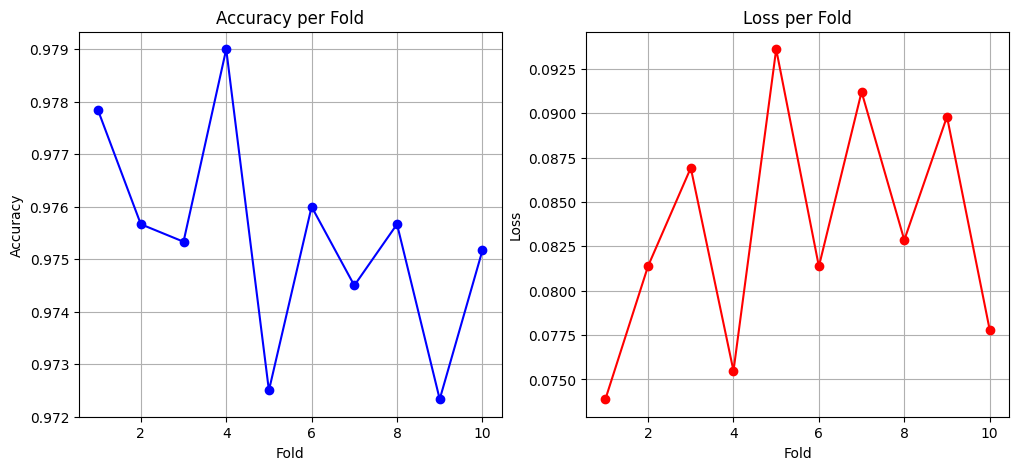

In [10]:
print("\nNguyễn Thành Luân - 6351071043")
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(1, num_folds+1), acc_per_fold, marker='o', linestyle='-', color='b')
plt.title('Accuracy per Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(1, num_folds+1), loss_per_fold, marker='o', linestyle='-', color='r')
plt.title('Loss per Fold')
plt.xlabel('Fold')
plt.ylabel('Loss')
plt.grid(True)

plt.show()

h) Sử	dụng	mô	hình	có	Accuracy	tốt	nhất giữa	các	fold trong	quá	trình	huấn
luyện	và phân	lớp	cho	tập	test.

Hướng	dẫn:

Sử	dụng argmax	của	thư	viện	numpy	để	chọn	ra	index có	accuracy lớn	nhất trong
accuracy_per_fold. Sau	đó	lấy	ra	models[index]

In [11]:
print("\nNguyễn Thành Luân - 6351071043")
best_fold_index = np.argmax(acc_per_fold)
best_model = models[best_fold_index]

print(f"Mô hình tốt nhất là ở Fold thứ: {best_fold_index + 1}")
print(f"Accuracy của model này trên tập Validation: {acc_per_fold[best_fold_index]*100:.2f}%")


Nguyễn Thành Luân - 6351071043
Mô hình tốt nhất là ở Fold thứ: 4
Accuracy của model này trên tập Validation: 97.90%


i) Tính	và	in	ra	Accuracy	của	mô	hình	trên	tập	test

In [13]:

test_predictions_prob = best_model.predict(test_images)
test_predictions = np.argmax(test_predictions_prob, axis=1)

print("\nNguyễn Thành Luân - 6351071043")
test_acc = accuracy_score(test_labels, test_predictions)
print(f"\nAccuracy trên tập Test thực tế: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Nguyễn Thành Luân - 6351071043

Accuracy trên tập Test thực tế: 0.9765


j) Tính	và	in	ra	Precision,	Recall,	F1-score	của	từng	lớp	và	trung	bình	của
mô	hình	trên	tập	test

In [14]:
print("\nNguyễn Thành Luân - 6351071043")
print("--- BÁO CÁO PHÂN LỚP (TEST SET) ---")
print(classification_report(test_labels, test_predictions, digits=4))


Nguyễn Thành Luân - 6351071043
--- BÁO CÁO PHÂN LỚP (TEST SET) ---
              precision    recall  f1-score   support

           0     0.9769    0.9908    0.9838       980
           1     0.9860    0.9912    0.9886      1135
           2     0.9797    0.9806    0.9801      1032
           3     0.9612    0.9822    0.9716      1010
           4     0.9765    0.9735    0.9750       982
           5     0.9731    0.9720    0.9725       892
           6     0.9801    0.9770    0.9786       958
           7     0.9748    0.9776    0.9762      1028
           8     0.9841    0.9528    0.9682       974
           9     0.9720    0.9643    0.9682      1009

    accuracy                         0.9765     10000
   macro avg     0.9764    0.9762    0.9763     10000
weighted avg     0.9765    0.9765    0.9765     10000



k) Hiển	thị	confusion	matrix	bằng	heat	map	(bản	đồ	nhiệt)


Nguyễn Thành Luân - 6351071043


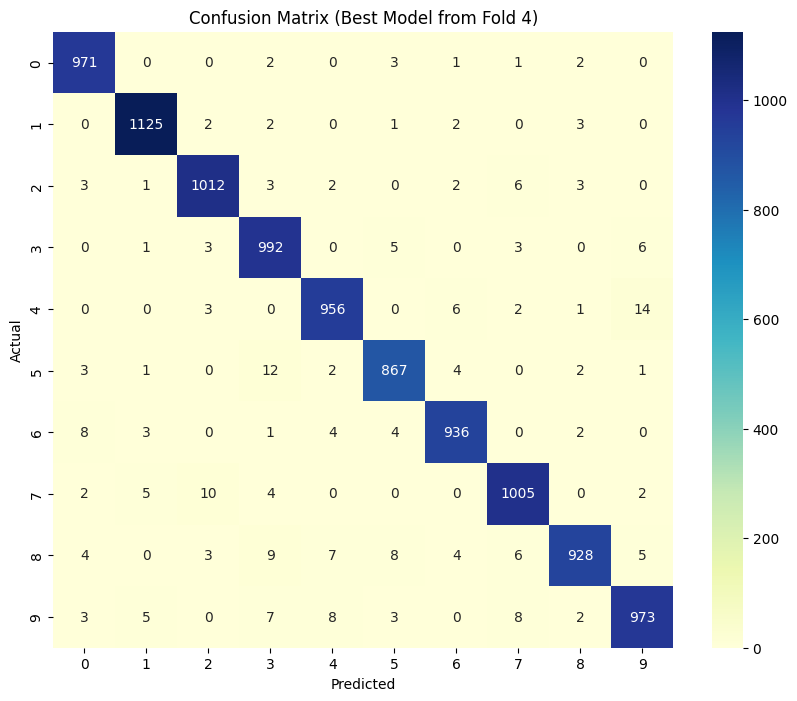

In [15]:
print("\nNguyễn Thành Luân - 6351071043")
cm = confusion_matrix(test_labels, test_predictions)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu')
plt.title(f'Confusion Matrix (Best Model from Fold {best_fold_index + 1})')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

l) In	ra	kết	quả	phân	lớp	của	05	ảnh	đầu	tiên	trong	tập	test

Hướng	dẫn:	Thực	hiện	tương	tự	như	câu	2


Nguyễn Thành Luân - 6351071043
Kết quả dự đoán 5 ảnh đầu tiên:


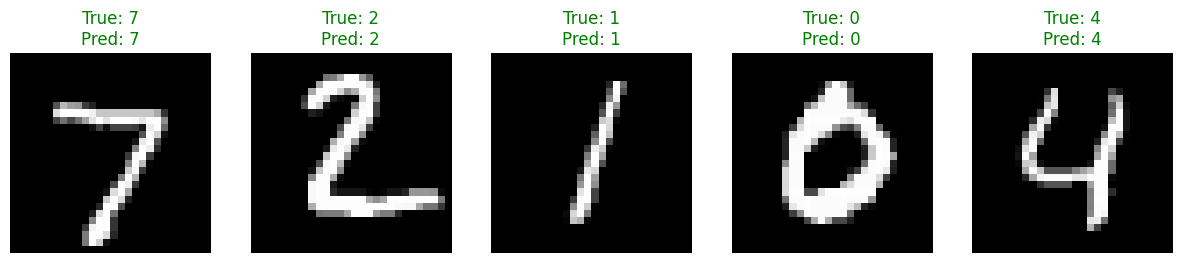

In [16]:
print("\nNguyễn Thành Luân - 6351071043")
plt.figure(figsize=(15, 3))

print("Kết quả dự đoán 5 ảnh đầu tiên:")
for i in range(5):
    plt.subplot(1, 5, i+1)

    img = test_images[i]
    true_lbl = test_labels[i]
    pred_lbl = test_predictions[i]

    plt.imshow(img, cmap='gray')

    col = 'green' if true_lbl == pred_lbl else 'red'
    plt.title(f"True: {true_lbl}\nPred: {pred_lbl}", color=col)
    plt.axis('off')

plt.show()